##b)

In [19]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [20]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X, y = mnist["data"], mnist["target"]

##c)

In [22]:
pip install scikit-multiflow

In [23]:
from skmultiflow.data import DataStream
import numpy as np
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


stream = DataStream(X, np.array(y))

##d)

In [24]:
X.shape

(70000, 784)

In [ ]:
import numpy as np
from skmultiflow.meta import AdaptiveRandomForestClassifier


max_samples = 200

n_estimators_values = [10, 50, 100]
grace_period_values = [50,100,150]
max_features_values = [0.1, 0.3, 0.5]

for n_estimators in n_estimators_values:
    for max_features in max_features_values:
      for grace_period in grace_period_values:

          n_samples = 0
          correct_cnt = 0

          arf = AdaptiveRandomForestClassifier(n_estimators=n_estimators, max_features=max_features,grace_period=grace_period)

          while n_samples < max_samples and stream.has_more_samples():

            X, y = stream.next_sample()
            y_pred = arf.predict(X)

            if y[0] == y_pred[0]:
               correct_cnt += 1

            arf.partial_fit(X, y)
            n_samples += 1

          print(f'n_estimators={n_estimators} max_feature={max_features} grace_period={grace_period}  Accuracy: {correct_cnt / n_samples}')

n_estimators=10 max_feature=0.1 grace_period=50  Accuracy: 0.6
n_estimators=10 max_feature=0.1 grace_period=100  Accuracy: 0.605
n_estimators=10 max_feature=0.1 grace_period=150  Accuracy: 0.52
n_estimators=10 max_feature=0.3 grace_period=50  Accuracy: 0.48
n_estimators=10 max_feature=0.3 grace_period=100  Accuracy: 0.42
n_estimators=10 max_feature=0.3 grace_period=150  Accuracy: 0.405
n_estimators=10 max_feature=0.5 grace_period=50  Accuracy: 0.12
n_estimators=10 max_feature=0.5 grace_period=100  Accuracy: 0.11
n_estimators=10 max_feature=0.5 grace_period=150  Accuracy: 0.195
n_estimators=50 max_feature=0.1 grace_period=50  Accuracy: 0.605
n_estimators=50 max_feature=0.1 grace_period=100  Accuracy: 0.625
n_estimators=50 max_feature=0.1 grace_period=150  Accuracy: 0.54
n_estimators=50 max_feature=0.3 grace_period=50  Accuracy: 0.5
n_estimators=50 max_feature=0.3 grace_period=100  Accuracy: 0.525
n_estimators=50 max_feature=0.3 grace_period=150  Accuracy: 0.515
n_estimators=50 max_featu

In [25]:
acc= []
window_acc=[]
window=[]

In [26]:
import numpy as np
from skmultiflow.meta import AdaptiveRandomForestClassifier


arf = AdaptiveRandomForestClassifier(n_estimators=50, max_features='auto',grace_period=100)

n_samples = 0
correct_cnt = 0
max_samples = 5000

stream = DataStream(X, np.array(y))

# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred = arf.predict(X)

    if y[0] == y_pred[0]:
        correct_cnt += 1

    arf.partial_fit(X, y)
    n_samples += 1


    acc.append(correct_cnt / n_samples)

    window.append(int(y[0] == y_pred[0]))
    if(len(window)>100):
       window.pop(0)
    window_acc.append(sum(window)/len(window))

# Display results
print('Adaptive Random Forest ensemble classifier example')
print('{} samples analyzed.'.format(n_samples))
print('Accuracy: {}'.format(correct_cnt / n_samples))

Adaptive Random Forest ensemble classifier example
5000 samples analyzed.
Accuracy: 0.6712


In [32]:
sum(window)/len(window)

0.77

In [33]:
max(window_acc)

0.85

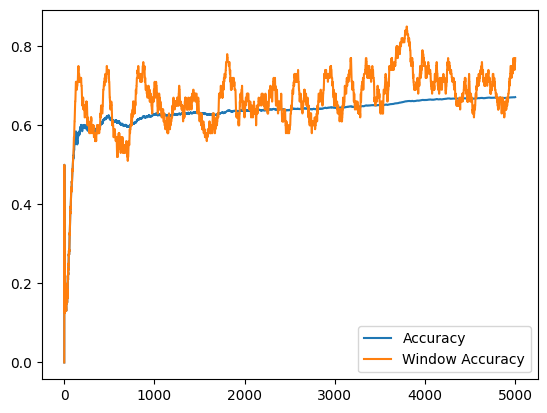

In [27]:
import matplotlib.pyplot as plt

plt.plot(acc, label='Accuracy')
plt.plot(window_acc, label='Window Accuracy')
plt.legend(loc='best')
plt.show()